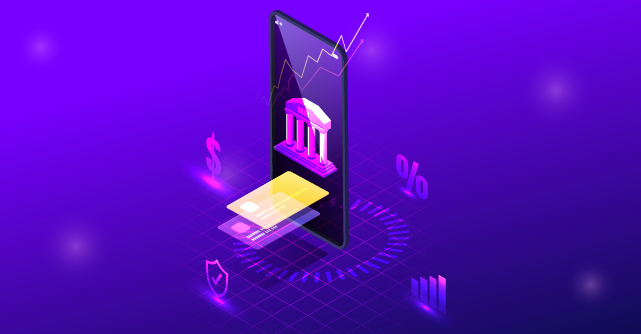

# **<font color='purple'><center>BA810 Team12 Bank Customer Churn Analysis</center></span>**
### **<font color='purple'><center>Team Members: Xinyi (Esme) Li, Carol Jiang, Nina Ren, Renata Halim**

### **<span id="ProjectOverview"> <font color="purple">Introduction and Motivation</span>**
---

Customer churn is a detrimental problem for all companies. But in the financial services industry, churn is of particular concern to companies with non-binding contracts, such as credit card companies, insurance agencies, credit unions, and banks. For these organizations, churn rates are commonly as high as 25% to 30%, while companies with annual contracts have churn rates of around 5% to 7%.

Churn rates are high for banks as there are many rivals in the industry, providing many options for customers to choose where to transact money. In addition to many industry rivals, online and mobile banking has made it convenient for customers to switch between banks. As threats of disruption in the industry via technology continue to rise, customer experience becomes increasingly important for financial institutions. After all, customer experience drives loyalty and reduces customer churn.

Our goal is to identify the key drivers of customer churn to help banks monitor trigger events that indicate whether a customer will leave while encouraging banks to improve their customer experience services to lower churn rates. 




### **<span id="ProjectOverview"> <font color="purple">Project Proposal</span>**
---

We aim to build a predictive model that accurately predicts if a customer will churn. To maximize profit, we will use our model to pinpoint and focus on factors most indicative of churn. That way, banks can effectively utilize resources to optimize customer service while still budgeting for operational costs.

To find the best predictive model, firstly, we will run some basic models using five classification methods: logistic regression, random forest, support vector machine (SVM), decision trees, and XGboost. Then, apply hyperparameter tuning on the models with the higher balanced accuracy score and smaller spread when calculating the 10 cross-validation score. Lastly, We will use the confusion matrix, F-1 score, and ROC to determine the best-performing model.

### **<span id="ProjectOverview"> <font color="purple">Data Source</span>**
---
From Kaggle, we downloaded a dataset published by Shantanu Dhakad. The data was collected in 2022 and sourced from a US bank. 

- Dhakad, S. (2022, March 19). Bank customer churn prediction. Kaggle. Retrieved November 16, 2022, from https://www.kaggle.com/datasets/shantanudhakadd/bank-customer-churn-prediction?datasetId=2008274&sortBy=voteCount 

For the dataset, Shantanu provided 14 columns that captured information on credit score, geography, gender, age, tenure, balance, estimated salary, activity, number of products, and whether the customer exited the bank. Furthermore, the dataset had a total of 10,000 columns.

### **<span id="ProjectOverview"> <font color="purple">Dataset Description</span>**
---
Column                       |Definition           |Variable Type                                                        |
---                          |---             |---                                                                |
CustomerId                           |Unique identifier | Categorical                                                |
CreditScore                        |Customer’s credit score      | Numeric  |
Geography                      |Customer's location |Categorical                                                  |
Gender              |Male/Female  |Categorical                                              |
Age                   |Age           |Numeric |
Tenure                  |Number of years that the customer have stayed in the bank |Numeric                            |
Balance                |Customer's average balance        |Numeric  |
NumOfProducts      |Number of bank products the customer is using         |Categorical  |
HasCrCard |Owns a credit card (Not Own = 0, Own = 1)         |Categorical|
IsActiveMember               |(No  = 0, Yes = 1)       | Categorical   |
EstimatedSalary  |Salary range          | Numeric |
Exited |Churn status (Churn = 0, Not Churn = 1) |Categorical (outcome variable)                                        |

### **<span id="ProjectOverview"> <font color="purple">Data Cleaning Process</span>**
---

In [ ]:
## Import packages
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm

## Connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 1: Retrieved and uploaded the raw datasets from Kaggle onto GCP.**

In [ ]:
## Load the dataset
data_folder = '/content/drive/Shared drives/BA 810/Data/'
bank = pd.read_csv(data_folder+'Churn_Modelling.csv', usecols=[0,1,2,3,4,5,6,7]) # skip the first column (0'th) containing row numbers.
bank = pd.read_csv(data_folder+'Churn_Modelling.csv', na_values='?').dropna()
bank.info()
bank.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Step 2: Removed 3 columns, RowNumber, Surname, and CustomerId as they are insignificant for our exploratory analysis.** 

In [ ]:
## Drop columns
bank.drop('RowNumber',axis = 1,inplace = True)
bank.drop('Surname',axis = 1,inplace = True)
bank.drop('CustomerId',axis = 1,inplace = True)

**Step 3: Finding missing values**

In [ ]:
## Check missing values
bank.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

There are no missing values in our dataset.

### **<span id="ProjectOverview"> <font color="purple">Limitations</span>**
---
- Although this dataset was captured by a US bank, it only provides information on customers in France, Spain, and Germany.
- As only 20.4% of our dataset captured customers who churned, there is a class imbalance where the dataset has a higher quantity of examples in one class (customer retained) and much fewer data of another (customer churned).
- There is no mention of a threshold used to differentiate an "active" member from an "inactive" one.

### **<span id="ProjectOverview"> <font color="purple">Data Exploration Analysis</span>**
---

This section will start with a basic overview of the bank churn dataset. Following this section, we will explore insights generated from analyzing the categorical variables: customer ID, geography, gender, number of products, credit card, and active status. We will then study information generated from analyzing the numeric variables: credit score, age, tenure, balance, and estimated salary. Lastly, we will concurrently analyze the categorical and numeric variables to see the variables' effect on churn.

According to our feature importance analysis, the five most relevant features are age, number of products, customer activity, balance, and geography. Therefore, we will be focusing on these five features in our exploratory data analysis as a guideline to build our final predictive model.

#### **<a id="Content"><font color="Purple">Section 1: Basic Overview of Dataset</a>**
---

1. **<span><font color="Purple">Basic dataset information</span>**
1. **<span><font color="Purple">Variables Classification</span>**
1. **<span><font color="Purple">Feature importance</span>**

##### **Basic dataset information**


In [ ]:
## Shape of the dataset
print("Shape of the dataset:")
print(bank.shape)

## Datatype of each column
print("Info of each column:")
print(bank.info())

## Dataset summary
bank.describe()

Shape of the dataset:
(10000, 11)
Info of each column:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 937.5+ KB
None


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##### **Variables Classification**

In [ ]:
def check_class(df):
    nuniquedf = pd.DataFrame({"Variable": df.columns,
                              "Classes": bank.nunique()})
    
    nuniquedf = nuniquedf.reset_index(drop = True)
    nuniquedf = nuniquedf.sort_values('Classes', ascending=False)

    return nuniquedf

print(check_class(bank))

           Variable  Classes
9   EstimatedSalary     9999
5           Balance     6382
0       CreditScore      460
3               Age       70
4            Tenure       11
6     NumOfProducts        4
1         Geography        3
2            Gender        2
7         HasCrCard        2
8    IsActiveMember        2
10           Exited        2


In [ ]:
## "NumOfProducts" classes check
print("NumOfProducts classes:", bank.NumOfProducts.unique())

## "Geography" classes check
print("Geography classes:", bank.Geography.unique())

## "Gender" classes check
print("Gender classes:", bank.Gender.unique())

## "HasCrCard" classes check
print("HasCrCard classes:", bank.HasCrCard.unique())

## "IsActiveMember" classes check
print("IsActiveMember classes:", bank.IsActiveMember.unique())

## "Exited" classes check
print("Exited classes:", bank.Exited.unique())

NumOfProducts classes: [1 3 2 4]
Geography classes: ['France' 'Spain' 'Germany']
Gender classes: ['Female' 'Male']
HasCrCard classes: [1 0]
IsActiveMember classes: [1 0]
Exited classes: [1 0]


Based on all the analysis above, we can define the variables classification:

**Categorical Variables**

1. NumOfProducts
2. Geography 
3. Gender 
4. HasCrCard 
5. IsActiveMember 
6. Exited

**Numerical Variables**

1. CreditScore
2. Age 
3. Tenure 
4. Balance 
5. EstimatedSalary

##### **Feature Importance (Preliminary)**

The five most relevant features in our dataset is:
1. age
2. number of products
3. customer activity
4. balance
5. geography

These will be the features to focus on during our EDA and *potentially* also the features we will include in our final model construction.

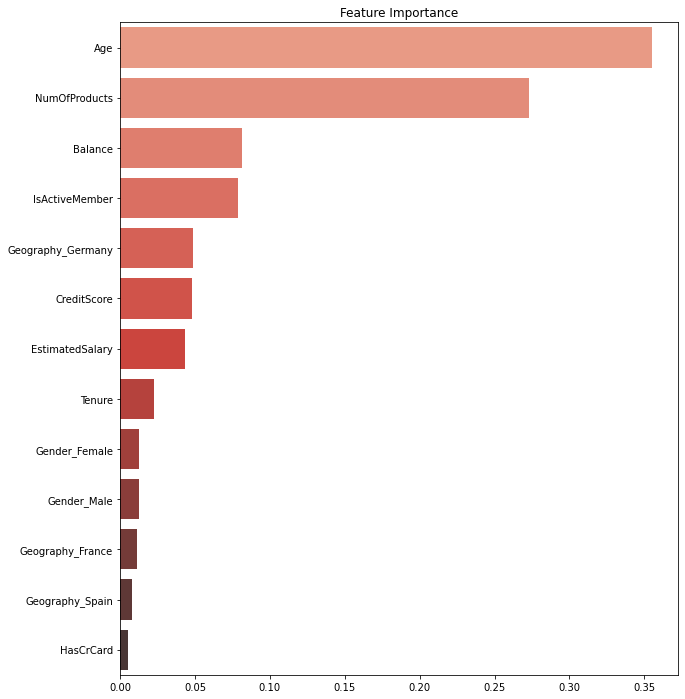

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params = {'random_state': 0, 'n_jobs': 4, 'n_estimators': 5000, 'max_depth': 8}
# One-hot encode
bank_fi = pd.get_dummies(bank)
x, y = bank_fi.drop("Exited",axis=1), bank_fi['Exited']

# Fit RandomForest Classifier
clf = RandomForestClassifier(**params)
clf = clf.fit(x, y)
# Plot features importances
imp = pd.Series(data=clf.feature_importances_, index=x.columns).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature Importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Reds_d", orient='h')

#### **<a id="Content"><font color="Purple">Section 2: Analysis on Categorical Variables</a>** 
---
4. Customers stayed/churned (response variable)
5. Geography, gender, credit card ownership, active membership, number of product on churn
6. Number of products on churn

##### **Customers stayed/churned (response variable)**

It is important to note that we have an imbalanced dataset, where 79.6% of total customers stayed while only 20.4% churned. In pinpointing this limitation, we must choose a predictive model with a higher ROC, AUC, or F-1 score instead of focusing on model accuracy because they ignore the issue of imbalanced datasets and are thus poor measures of evaluation for our model.

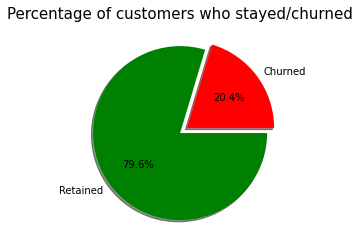

In [ ]:
## Check the percentage of categorical response variable
fig,ax = plt.subplots(figsize = (4, 4))
pie_data = [bank.Exited[bank["Exited"] == 1].count(), bank.Exited[bank["Exited"] == 0].count()]
pie_labels = ["Churned", "Retained"]
textprops = {"fontsize":10}
ax.pie(pie_data, labels = pie_labels, explode = [0.1, 0], shadow = True, colors= ['red','green'], autopct = "%.1f%%", textprops =textprops)
plt.title("Percentage of customers who stayed/churned", size = 15)
plt.show()

##### **Geography, gender, credit card ownership, active membership, number of products on churn**

**Geography**
- Germany has the highest count of churn, followed by France and Spain. 
- Approximately 1/3 of all German customers in this dataset churned.

**Gender**
- For this given bank, more females churned than males.

**HasCrCard**
- Credit card has little impact on churn. However, it is surprising that (slightly) more customers with a credit card churned than customers without a credit card.

**IsActiveMember**
- Inactive members are likelier to churn.
- However, the number of inactive members is almost the same as the number of active ones; this should be a concern for the bank.

**NumOfProducts**
- Customers with a high number of products, like 3 or 4 number, tend to leave our bank.
- The majority of customers in the bank own 1-2 products.

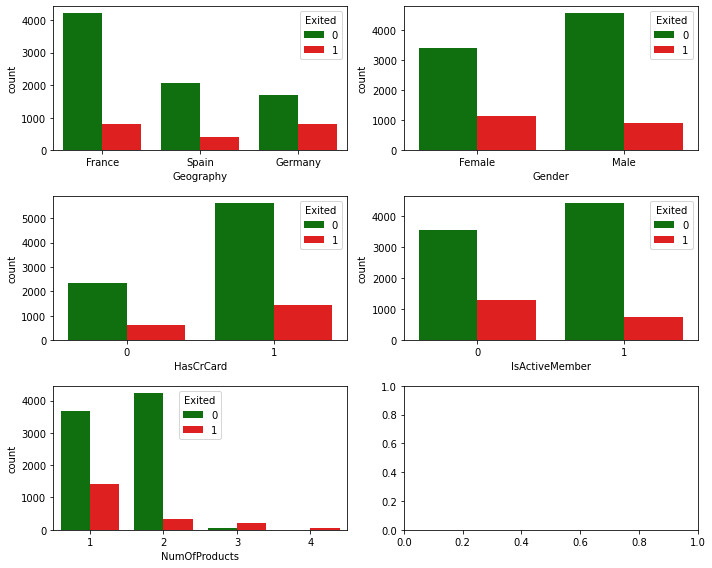

In [ ]:
fig,ax = plt.subplots(3, 2, figsize = (10,8), tight_layout = True)
sns.countplot(data = bank, x = "Geography", hue = "Exited", ax = ax[0,0], palette=["green", "red"])
sns.countplot(data = bank, x = "Gender", hue = "Exited", ax = ax[0,1], palette=["green", "red"])
sns.countplot(data = bank, x = "HasCrCard", hue = "Exited", ax = ax[1,0], palette=["green", "red"])
sns.countplot(data = bank, x = "IsActiveMember", hue = "Exited", ax = ax[1,1], palette=["green", "red"])
sns.countplot(data = bank, x = "NumOfProducts", hue = "Exited", ax = ax[2,0], palette=["green", "red"])
plt.show()

##### **Number of products on churn**
From the diagram, we can see that the more products a customer has from the bank (3/4 in comparison to 1/2), the likelier they will churn. **However**, before solidifying this conclusion, we must also recall that our dataset is imbalanced.

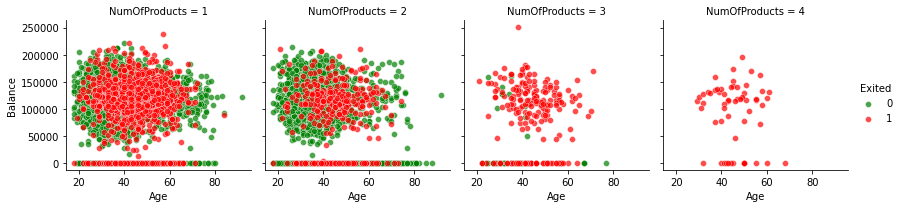

In [ ]:
g = sns.FacetGrid(bank, col='NumOfProducts', hue='Exited', palette=['green','red'])
g.map(sns.scatterplot, 'Age', 'Balance', alpha=.7)
g.add_legend();

#### **<a id="Content"><font color="Purple">Section 3: Analysis on Numeric Variables</a>**
---
7. Correlation among numeric variables
8. Credit score, age, tenure, balance, number of products, and estimated salary on churn

##### **Correlation among numeric variables**

There are no obvious relationships between the numeric variables.

In [ ]:
## Correlation between different variables
bankcorr = bank[["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]].corr()
bankcorr

,CreditScore,Age,Tenure,Balance,EstimatedSalary
CreditScore,1.000000,-0.003965,0.000842,0.006268,-0.001384
Age,-0.003965,1.000000,-0.009997,0.028308,-0.007201
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.007784
Balance,0.006268,0.028308,-0.012254,1.000000,0.012797
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,1.000000


##### **Credit score, age, tenure, balance, number of products, and estimated salary on churn**
- The difference in customer **tenure is not a significant factor** that determines whether a customer stays/leaves the bank.
- As presented by the plots, **age seems to be a significant determinant of churn**. Customers around 35 to 40 are the most likely to stay, whereas customers around 40 to 50 are the most likely to churn.
- **Balance is another significant determinant of churn**. Customers with a bank balance of $100-150K are the most likely to leave. 

Reinforcing the findings of our **feature importance analysis**, age and balance appear to be the most significant numeric variables that affect churn.

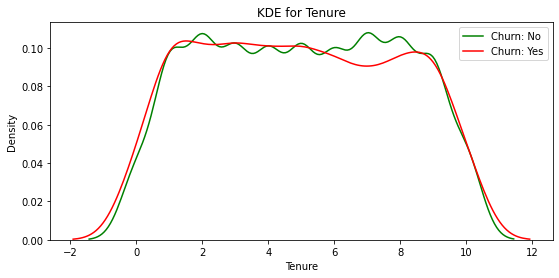

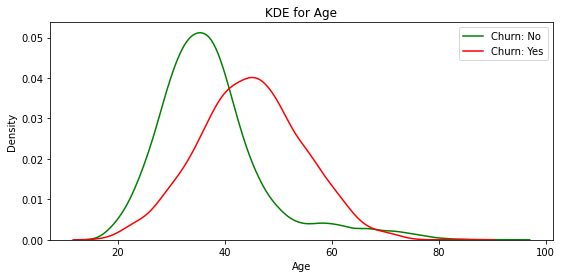

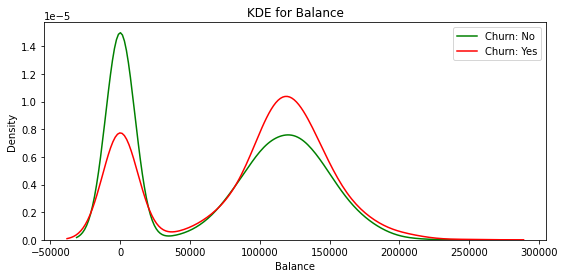

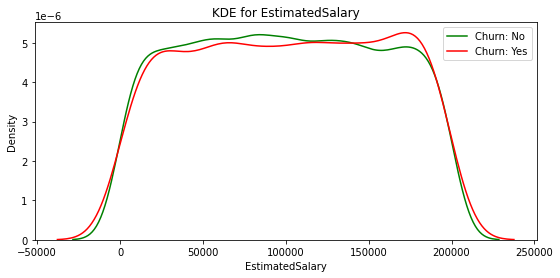

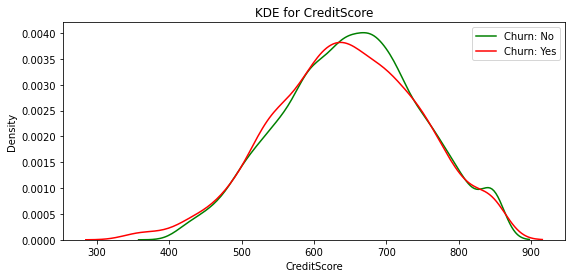

In [ ]:
#### ADD LEGEND
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(bank[bank['Exited'] == 0][feature].dropna(), color= 'green', label= 'Churn: No')
    ax1 = sns.kdeplot(bank[bank['Exited'] == 1][feature].dropna(), color= 'red', label= 'Churn: Yes')
    plt.legend()
kdeplot('Tenure')
kdeplot('Age')
kdeplot('Balance')
kdeplot('EstimatedSalary')
kdeplot('CreditScore')

#### **<a id="Content"><font color="Purple">Section 4: Analysis on Categorical and Numeric Variables</a>**

9. Correlation among all variables
10. Impact of gender on churn
11. Impact of geography on churn


##### **Correlation among all variables**

There are no obvious relationships between variables.

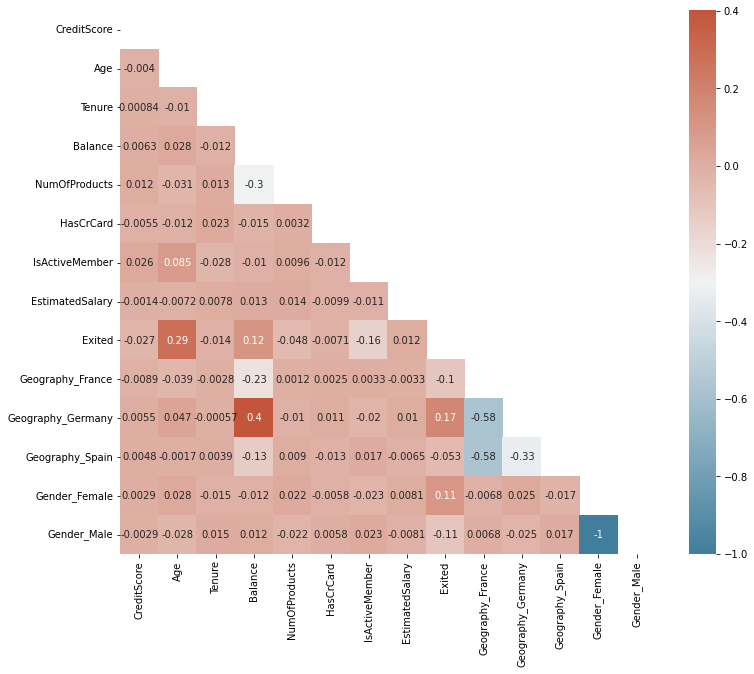

In [ ]:
bank1=bank[['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 
            'HasCrCard','IsActiveMember', 'EstimatedSalary', 'Exited']]
bank2=pd.get_dummies(bank1)
bankcorr = bank2.corr()

## Heatmap for corr
## Set up the matplotlib plot configuration
f, ax = plt.subplots(figsize=(12, 10))
## Generate a mask for upper traingle
mask = np.triu(np.ones_like(bankcorr, dtype=bool))
## Configure a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)
## Draw the heatmap
sns.heatmap(bankcorr, annot=True, mask = mask, cmap=cmap)

#####**Impact of gender on churn**


In general, gender does not impact the likelihood to churn by much.
- Older customers (approximately ages 44) are likelier to churn
- Customers who possess less number of products are likelier to churn
- Less active members are likelier to churn
- Customers with higher bank balances are likelier to churn
- Customers with lower credit scores are likelier to churn

Thus, as was indicated by our feature importance analysis, **gender is not a variable that significantly impacts churn**.

In [ ]:
bank.pivot_table(values='Age', index='Gender', columns='Exited', aggfunc='mean')

Exited,0,1
Gender,,
Female,37.382491,44.784899
Male,37.427725,44.905345


In [ ]:
bank.pivot_table(values='NumOfProducts', index='Gender', columns='Exited', aggfunc='mean')

Exited,0,1
Gender,,
Female,1.555229,1.510975
Male,1.536082,1.429844


In [ ]:
bank.pivot_table(values='IsActiveMember', index='Gender', columns='Exited', aggfunc='mean')

Exited,0,1
Gender,,
Female,0.549354,0.363477
Male,0.558456,0.357461


In [ ]:
bank.pivot_table(values='Balance', index='Gender', columns='Exited', aggfunc='mean')

Exited,0,1
Gender,,
Female,71183.249639,89036.639359
Male,73911.607037,93736.483742


In [ ]:
bank.pivot_table(values='CreditScore', index='Gender', columns='Exited', aggfunc='mean')

Exited,0,1
Gender,,
Female,652.152468,646.883231
Male,651.629743,643.408686


##### **Impact of geography on churn**
The findings are mainly similar to that of the effects of gender on churn.

However, what is interesting is that while *71,192* and *72,513* are the average balance of churned customers in France and Spain, *120,361* is the average balance of churned customers in Germany. The reason behind this is that Germany has a competitive market where customers tend to leave or move to another bank if they can gain more benefits elsewhere; we assume that another bank offers better benefits for customers with a balance of 120K+ in the bank.

Thus besides Germany, 

age
number of products
customer activity
balance
geography

In [ ]:
bank.pivot_table(values='Balance', index='Geography', columns='Exited', aggfunc='mean')

Exited,0,1
Geography,,
France,60339.275678,71192.795728
Germany,119427.106696,120361.075590
Spain,59678.070470,72513.352446


In [ ]:
bank.pivot_table(values='Age', index='Geography', columns='Exited', aggfunc='mean')

Exited,0,1
Geography,,
France,37.235966,45.133333
Germany,37.311504,44.894349
Spain,37.839147,44.147700


In [ ]:
bank.pivot_table(values='IsActiveMember', index='Geography', columns='Exited', aggfunc='mean')

Exited,0,1
Geography,,
France,0.545433,0.367901
Germany,0.561652,0.363636
Spain,0.567345,0.341404


In [ ]:
bank.pivot_table(values='CreditScore', index='Geography', columns='Exited', aggfunc='mean')

Exited,0,1
Geography,,
France,651.162226,641.914815
Germany,653.261357,647.689189
Spain,652.104167,647.484262


In [ ]:
bank.pivot_table(values='CreditScore', index='Geography', columns='Exited', aggfunc='mean')

Exited,0,1
Geography,,
France,651.162226,641.914815
Germany,653.261357,647.689189
Spain,652.104167,647.484262


### **<a id="Content"><font color="Purple">Prepare The Data for Machine Learning Algorithm</a>**

#### **<a id="Content"><font color="Purple">Split Train Dataset and Test Dataset**

In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(bank, test_size = .2, random_state=0)
train_data.shape, test_data.shape

((8000, 11), (2000, 11))

#### **<a id="Content"><font color="Purple">Construct the Preprocessing Pipepline**

In [ ]:
# standardizing the numeric columns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn import set_config

set_config(display='diagram')

num_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
    ])

In [ ]:
# expanding the categorical variables
from sklearn.preprocessing import OneHotEncoder
cat_pipeline = Pipeline([
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("cat_encoder", OneHotEncoder(handle_unknown='ignore', sparse=False, drop="first"))
    ])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC  

num_attribs = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
cat_attribs = ['Geography','Gender', 'NumOfProducts', 'HasCrCard','IsActiveMember']

# The following step patches SimpleImputer to produce feature names
SimpleImputer.get_feature_names_out = StandardScaler.get_feature_names_out

preprocess_pipeline = ColumnTransformer([ 
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs),
    ])

preprocess_pipeline

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['CreditScore', 'Age', 'Tenure', 'Balance',
                                  'EstimatedSalary']),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('cat_encoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse=False))]),
                                 ['Geography', 'Gender', 'NumOfProducts',
                                  'HasCrCard', 'IsActiveMember'])])

In [ ]:
## Split x and y in train set
df_X = train_data.drop("Exited", axis=1)
df_y = train_data["Exited"]

## Check whether 'y' is included
print(df_X.head())

## Put the training data in the pipeline
X_train = preprocess_pipeline.fit_transform(df_X)
y_train = df_y.values

## Check the features in the pipeline
preprocess_pipeline.get_feature_names_out()

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
7389          667     Spain  Female   34       5       0.00              2   
9275          427   Germany    Male   42       1   75681.52              1   
2995          535    France  Female   29       2  112367.34              1   
5316          654     Spain    Male   40       5  105683.63              1   
356           850     Spain  Female   57       8  126776.30              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
7389          1               0        163830.64  
9275          1               1         57098.00  
2995          1               0        185630.76  
5316          1               0        173617.09  
356           1               1        132298.49  


array(['num__CreditScore', 'num__Age', 'num__Tenure', 'num__Balance',
       'num__EstimatedSalary', 'cat__Geography_Germany',
       'cat__Geography_Spain', 'cat__Gender_Male', 'cat__NumOfProducts_2',
       'cat__NumOfProducts_3', 'cat__NumOfProducts_4', 'cat__HasCrCard_1',
       'cat__IsActiveMember_1'], dtype=object)

## **<span id="ProjectOverview"> <font color="purple">Modelling</span>**
---

1. Logistic Regression
2. Random Forest
3. Support Vector Machine (SVM)
4. Decision Tree
5. XGboost


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
seed = 42

### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_pipe = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("logistic_Reg", LogisticRegression(random_state=seed)),
])

lr_scores = cross_val_score(lr_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
lr_scores.mean().round(3)

0.667

### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_pipe = Pipeline([
    ("preprocessing", preprocess_pipeline),
    ("random_forest", RandomForestClassifier(random_state=seed)),
])

rf_scores = cross_val_score(rf_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
rf_scores.mean().round(3)

0.717

### **SVM**

In [ ]:
from sklearn.svm import SVC

svc_pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('svm', SVC(random_state=seed)),
])

svc_scores = cross_val_score(svc_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
svc_scores.mean().round(3)

0.676

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('dt', DecisionTreeClassifier(random_state=seed)),
])

dt_scores = cross_val_score(dt_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
dt_scores.mean().round(3)

0.675

In [ ]:
#use decisiontree estimator
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'num__Age <= 0.349\ngini = 0.325\nsamples = 8000\nvalue = [6368, 1632]'),
 Text(0.25, 0.625, 'cat__NumOfProducts_3 <= 0.5\ngini = 0.209\nsamples = 5707\nvalue = [5029, 678]'),
 Text(0.125, 0.375, 'cat__NumOfProducts_2 <= 0.5\ngini = 0.191\nsamples = 5598\nvalue = [4998, 600]'),
 Text(0.0625, 0.125, 'gini = 0.284\nsamples = 2771\nvalue = [2297, 474]'),
 Text(0.1875, 0.125, 'gini = 0.085\nsamples = 2827\nvalue = [2701, 126]'),
 Text(0.375, 0.375, 'num__Balance <= -0.845\ngini = 0.407\nsamples = 109\nvalue = [31, 78]'),
 Text(0.3125, 0.125, 'gini = 0.496\nsamples = 46\nvalue = [25, 21]'),
 Text(0.4375, 0.125, 'gini = 0.172\nsamples = 63\nvalue = [6, 57]'),
 Text(0.75, 0.625, 'cat__NumOfProducts_2 <= 0.5\ngini = 0.486\nsamples = 2293\nvalue = [1339, 954]'),
 Text(0.625, 0.375, 'cat__IsActiveMember_1 <= 0.5\ngini = 0.493\nsamples = 1416\nvalue = [622, 794]'),
 Text(0.5625, 0.125, 'gini = 0.394\nsamples = 708\nvalue = [191, 517]'),
 Text(0.6875, 0.125, 'gini = 0.476\nsample

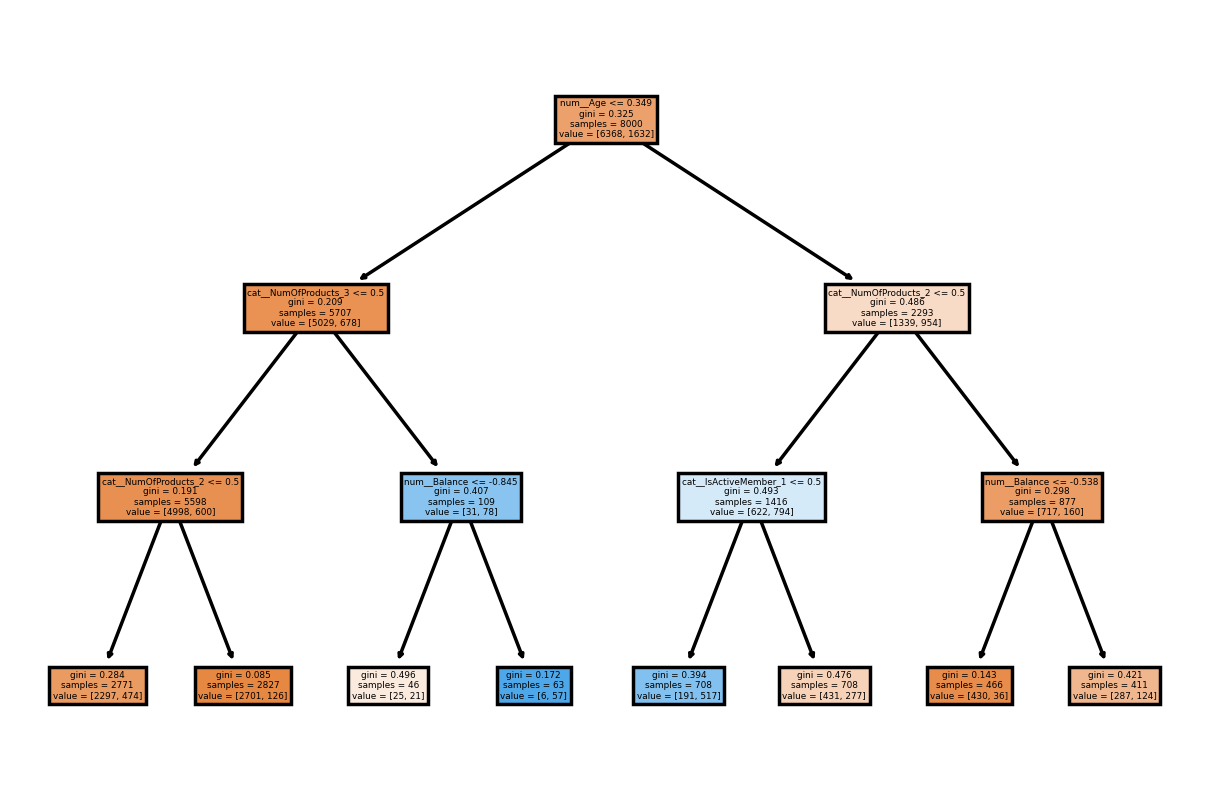

In [ ]:
plt.figure(dpi=250)
plot_tree(clf, filled=True, feature_names=preprocess_pipeline.get_feature_names_out())

### **XGboost**

In [ ]:
from xgboost import XGBClassifier

xgb_pipe = Pipeline([
    ('preprocessing', preprocess_pipeline),
    ('xgb', XGBClassifier(random_state=seed)),
])

xgb_scores = cross_val_score(xgb_pipe, df_X, df_y, cv=10, scoring='balanced_accuracy')
xgb_scores.mean().round(3)

0.712

### **Model Accuary Comparision without hyperparameter tuning**

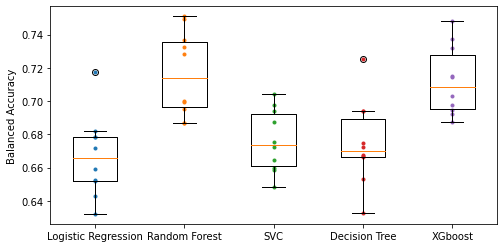

In [ ]:
import matplotlib

plt.figure(figsize=(8, 4))
plt.plot([1]*10, lr_scores, ".")
plt.plot([2]*10, rf_scores, ".")
plt.plot([3]*10, svc_scores, ".")
plt.plot([4]*10, dt_scores, ".")
plt.plot([5]*10, xgb_scores, ".")

plt.boxplot([lr_scores, rf_scores, svc_scores, dt_scores, xgb_scores], 
            labels=("Logistic Regression", "Random Forest", "SVC", "Decision Tree", "XGboost"))
plt.ylabel("Balanced Accuracy")
plt.show()


We run 10 cross-validation scores for each model and plot the balanced accuracy scores in the boxplot. We found that: randome forest and xgboost have a higher score and smaller spread. So, we will pick up these two for grid search in our next step. Also, SVM has a relatively higher score, so we will consider it in tuning as well.

Since the theory in the back of random forest and xgboost is decision tree, and the performance of decision tree is relatively worse than others, then we decide not to apply hyperparameter tuning for decision tree.

Therefore, based on the accuracy performance of five models, we will apply hyperparameter tuning on Random Forest, SVC, and XGboost models. 

## **<span id="ProjectOverview"> <font color="purple">Hyperparameter Tuning</span>**
---

1. Random Forest
2. SVM
3. XGboost


### **Random Forest**

In [ ]:
param_grid = [ 
    {'random_forest__max_depth': np.arange(2, 11, 2), 
    'random_forest__min_samples_leaf': np.arange(2, 11, 2)}, 
    ]
# Check what's in this parameter grid
print('The parameter grid: ')
print(param_grid)

rf_grid_search = GridSearchCV(rf_pipe, param_grid, cv=3, scoring='balanced_accuracy')
rf_grid_search.fit(df_X, df_y)
print('\n\nThe best parameters are ', rf_grid_search.best_params_)

rf_grid_search.best_estimator_
rf_cv_res = pd.DataFrame(rf_grid_search.cv_results_)
rf_cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)
rf_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The parameter grid: 
[{'random_forest__max_depth': array([ 2,  4,  6,  8, 10]), 'random_forest__min_samples_leaf': array([ 2,  4,  6,  8, 10])}]


The best parameters are  {'random_forest__max_depth': 10, 'random_forest__min_samples_leaf': 2}


,param_random_forest__max_depth,param_random_forest__min_samples_leaf,mean_test_score
20,10,2,0.704302
21,10,4,0.701160
22,10,6,0.697491
15,8,2,0.695127
17,8,6,0.692078


### **SVM**

In [ ]:
param_grid = [
  {'svm__kernel': ['linear'], 'svm__C': [1, 10, 100, 1000]},
  {'svm__kernel': ['rbf'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001]},
  {'svm__kernel': ['poly'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001], 'svm__degree': [2, 3, 4]},
]             
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)
  
svm_grid_search = GridSearchCV(svc_pipe, param_grid, cv=3, scoring='balanced_accuracy')
svm_grid_search.fit(df_X, df_y)
print('\n\nThe best parameters are ', svm_grid_search.best_params_)

svm_cv_res = pd.DataFrame(svm_grid_search.cv_results_)
svm_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
svm_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The parameter grid : 
[{'svm__kernel': ['linear'], 'svm__C': [1, 10, 100, 1000]}, {'svm__kernel': ['rbf'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001]}, {'svm__kernel': ['poly'], 'svm__C': [1, 10, 100, 1000], 'svm__gamma': [0.001, 0.0001], 'svm__degree': [2, 3, 4]}]


The best parameters are  {'svm__C': 1000, 'svm__gamma': 0.001, 'svm__kernel': 'rbf'}


,param_svm__C,param_svm__kernel,param_svm__gamma,param_svm__degree,mean_test_score
10,1000,rbf,0.001,NaN,0.639104
0,1,linear,NaN,NaN,0.564882
8,100,rbf,0.001,NaN,0.564882
1,10,linear,NaN,NaN,0.564882
11,1000,rbf,0.0001,NaN,0.564882


### **XGBoost**

In [ ]:
param_grid = [ 
    {'xgb__max_depth': [2, 3, 5, 7, 10],
     'xgb__n_estimators': [10, 100, 500]}
    ]       
# Check what's in this parameter grid
print('The parameter grid : ')
print(param_grid)
  
xgb_grid_search = GridSearchCV(xgb_pipe, param_grid, cv=3, 
                                 scoring='balanced_accuracy')
xgb_grid_search.fit(df_X, df_y)
print('\n\nThe best parameters are ', xgb_grid_search.best_params_)

xgb_cv_res = pd.DataFrame(xgb_grid_search.cv_results_)
xgb_cv_res.sort_values(by='mean_test_score', ascending=False, inplace=True)
xgb_cv_res.filter(regex = '(^param_|mean_test_score)', axis=1).head()

The parameter grid : 
[{'xgb__max_depth': [2, 3, 5, 7, 10], 'xgb__n_estimators': [10, 100, 500]}]


The best parameters are  {'xgb__max_depth': 3, 'xgb__n_estimators': 500}


,param_xgb__max_depth,param_xgb__n_estimators,mean_test_score
5,3,500,0.723569
2,2,500,0.722319
10,7,100,0.717654
7,5,100,0.716906
8,5,500,0.715888


## **<span id="ProjectOverview"> <font color="purple">Model Evaluation</span>**
---

### **Validation**

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import metrics

In [ ]:
## Split x and y in test set
df_X_test = test_data.drop("Exited", axis=1)
df_y_test = test_data["Exited"]

## Check whether 'y' is included
print(df_X_test.head())

## Put the training data in the pipeline
X_test = preprocess_pipeline.fit_transform(df_X_test)
y_test = df_y_test.values

      CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
9394          597   Germany  Female   35       8  131101.04              1   
898           523    France  Female   40       2  102967.41              1   
2398          706     Spain  Female   42       8   95386.82              1   
5906          788    France    Male   32       4  112079.58              1   
2343          706   Germany    Male   38       5  163034.82              2   

      HasCrCard  IsActiveMember  EstimatedSalary  
9394          1               1        192852.67  
898           1               0        128702.10  
2398          1               1         75732.25  
5906          0               0         89368.59  
2343          1               1        135662.17  


Random Forest
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      1595
           1       0.97      0.62      0.75       405

    accuracy                           0.92      2000
   macro avg       0.94      0.81      0.85      2000
weighted avg       0.92      0.92      0.91      2000



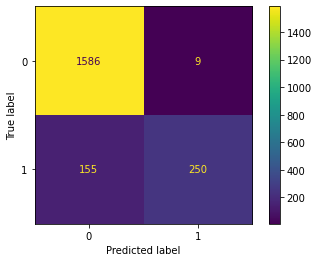

In [ ]:
print("Random Forest")
rf_model = rf_grid_search.best_estimator_
rf_model.fit(df_X_test, df_y_test)
rf_yhat = rf_model.predict(df_X_test)
print(classification_report(df_y_test, rf_yhat))

ConfusionMatrixDisplay.from_predictions(df_y_test, rf_yhat);

SVM
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1595
           1       0.88      0.32      0.47       405

    accuracy                           0.85      2000
   macro avg       0.87      0.65      0.69      2000
weighted avg       0.86      0.85      0.82      2000



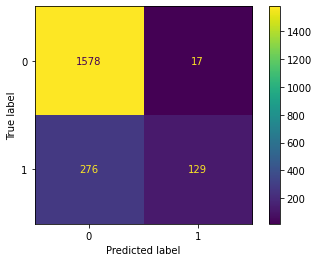

In [ ]:
print("SVM")
svm_model = svm_grid_search.best_estimator_
svm_model.fit(df_X_test, df_y_test)
svm_yhat = svm_model.predict(df_X_test)
print(classification_report(df_y_test, svm_yhat))

ConfusionMatrixDisplay.from_predictions(df_y_test, svm_yhat);

XGboost
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1595
           1       0.96      0.81      0.88       405

    accuracy                           0.95      2000
   macro avg       0.96      0.90      0.93      2000
weighted avg       0.96      0.95      0.95      2000



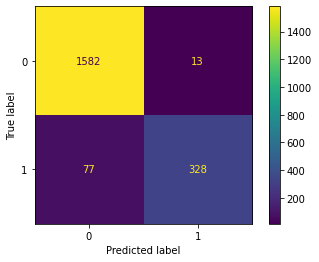

In [ ]:
print("XGboost")
xgb_model = xgb_grid_search.best_estimator_
xgb_model.fit(df_X_test, df_y_test)
xgb_yhat = xgb_model.predict(df_X_test)
print(classification_report(df_y_test, xgb_yhat))

ConfusionMatrixDisplay.from_predictions(df_y_test, xgb_yhat);

### **ROC**

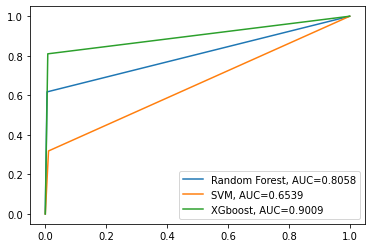

In [ ]:
#set up plotting area
plt.figure(0).clf()

#fit Random Forest model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(df_y_test, rf_yhat)
auc_rf = round(metrics.roc_auc_score(df_y_test, rf_yhat), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc_rf))

#fit SVM model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(df_y_test, svm_yhat)
auc_svm = round(metrics.roc_auc_score(df_y_test, svm_yhat), 4)
plt.plot(fpr,tpr,label="SVM, AUC="+str(auc_svm))

# fit XGboost model and plot ROC curve
fpr, tpr, _ = metrics.roc_curve(df_y_test, xgb_yhat)
auc_xgb = round(metrics.roc_auc_score(df_y_test, xgb_yhat), 4)
plt.plot(fpr,tpr,label="XGboost, AUC="+str(auc_xgb))

#add legend
plt.legend()

In [ ]:
print('Random Forest: ROC AUC=%.3f' % (auc_rf))
print('SVM: ROC AUC=%.3f' % (auc_svm))
print('XGboost: ROC AUC=%.3f' % (auc_xgb))

Random Forest: ROC AUC=0.806
SVM: ROC AUC=0.654
XGboost: ROC AUC=0.901


After the hyperparameter tuning on these three models, we got some evaluation metrics. 

Since the goal of our project is to increase the retention rate of the bank, so we want to figure out which customers have the potential to leave, so we can implement some strategies for these highlighted people in time to keep them profitable without leaving. So, we will focus more on the recall measures on 1, on the churn customers, rather than only the model accuracy. 

But, at the same time, we try to maintain a high precision so that the bank does not need to waste too many resources on false positives. The bank just can spend time on clients that are highlighted by the model.

Based on the evaluation output above, XGboost gives us a better balance between recall and precision. The recall of churned customers is 0.81 and the precision is 0.96, which are both relatively high among these three models. 

Also, it has a higher AUC score in the ROC curve.

So, we will pick up this xgboost model as our final decision.

### **Feature Importance based on best model**

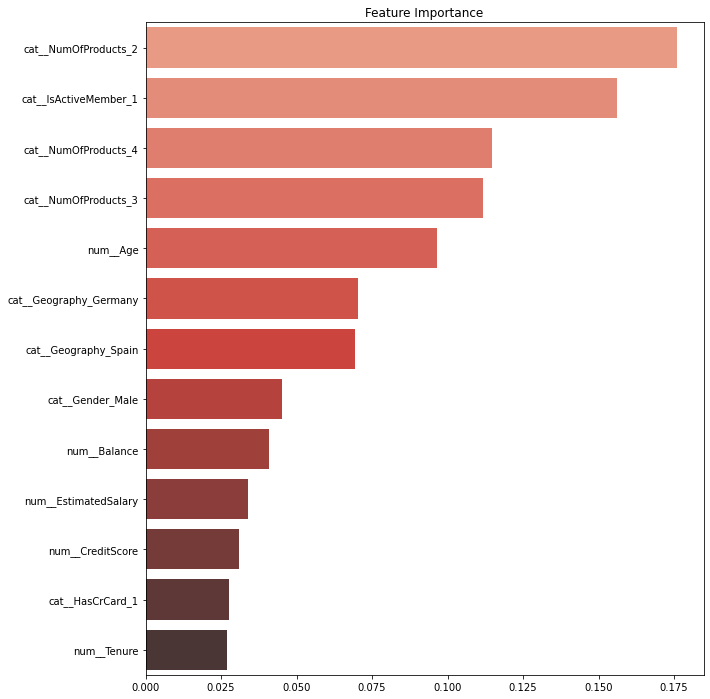

In [ ]:
# Plot features importances
xgb_grid_search.best_estimator_._final_estimator.feature_importances_

# Plot features importances
imp = pd.Series(data=xgb_grid_search.best_estimator_._final_estimator.feature_importances_, index=xgb_pipe[:-1].get_feature_names_out()).sort_values(ascending=False)
plt.figure(figsize=(10,12))
plt.title("Feature Importance")
ax = sns.barplot(y=imp.index, x=imp.values, palette="Reds_d", orient='h')

The most important predictor variables found using our preliminary feature importance analysis are nearly identical to the ones found using another feature importance analysis based on our best model. The only difference is the order of importance of the predictor variables on churn.

Under XGboost model, all variables have a good importance performance without any negative importance, so we do not need to go back to the front to change the variables in our model and re-run the whole project and hyperparameter tuning. We can decide to use this model as our final decision.

## **<span id="ProjectOverview"> <font color="purple">Challenges</span>**
---

**Feature Selection and Feature Importance**

As our dataset does not include many variables, we chose not to conduct a feature selection. Instead, we ran a feature importance analysis at the beginning of our research.

- After choosing our final predictive model, we ran another feature importance analysis to verify that the variables identified in our second feature importance analysis were the same as the ones identified in our first feature importance analysis. 
- We also ran our preliminary/first feature importance analysis before constructing our predictive models to specify which of our ten variables to focus conducting analyses on. 

**SVM Model**

It was challenging to conduct hyperparameter tuning as the SVM parameters were too large, making each tuning process lengthy. 
- Initially, we struggled with choosing variables to focus on to build our predictive model. 
- To solve this issue, we conducted a feature importance analysis before constructing our SVM model to filter out the most significant variables that impact churn. 
Once we chose our best predictive model with the highest accuracy score, we ran another feature importance analysis to check if these variables had the highest impact on churn.

**Decision Tree Model**

We struggled when picking the optimum depth for our decision tree model because we wanted to avoid overfitting and underfitting our decision tree model. While attempting to find the best model depth, we created decision tree models with three to five branches.
- For models with fewer parameters (that only included variables with the highest feature importance):
 - An advantage is that it can adapt to unseen data better.
 - However, a disadvantage is that the significance of some data points can be ignored, which may result in an underperforming model due to its underfitting data.
- For models with more parameters
 - An advantage is that all variables’ impact will be captured in the model, allowing the model to perform well during the testing stage.
 - However, a disadvantage is that too many variables can overcomplicate the model, which leads to overfitting and poor performance when tested on unseen data.
Our solution was to prune the tree

**Model Evaluation**

- Since the goal of our project is to increase the retention rate of the bank, so we want to figure out which customers have the potential to leave, so we can implement some strategies for these highlighted people in time to keep them profitable without leaving.
- Because we have an imbalanced dataset, we want to focus more on F-1 score and ROC AUC score instead of just focusing on the model accuracy. We can try oversampling in the future due to the imbalanced dataset.

## **<span id="ProjectOverview"> <font color="purple">Conclusion</span>**
---

**Our initial prediction was that customers with more products or higher bank balances would be the most loyal to the bank. However, it was to our surprise to find that our analyses showed that those very customers were the ones most likely to churn.** 

Based on our analyses:
- Customers aged between 40 to 45 are most likely to churn
- Customers with a higher bank balance are more likely to churn
- Customers who have more products are more likely to churn

**Preventing our customers between the ages of 40 to 45 from churning**

Our research suggests that customers between 40 to 45 tend to prioritize and place their retirement plans of high importance. 
- To prevent them from churning, we recommend that the bank improve its pension plan offerings by providing better pension benefits and 401k plans.

**Preventing customers with a higher bank balance and more exposure to the bank’s products from leaving**

Customers with the most money stored and exposure to the bank’s products and services are also those who are most likely to churn. Having the funds and having undergone product adoption, these customers should have been the bank's largest source of revenue; for that reason, their high likelihood of churning is a huge missed opportunity for the bank. To retain these customers in the future, we recommend the bank integrate digital technology into all areas of the bank and focus on building an ecosystem that deepens customer engagement. Ultimately, our recommendation aims to reduce the churn rates of high revenue-potential customers.
- Our focus (at least in the beginning) would be to build a better digital ecosystem and design our platform tailored to our mentioned target customers. Our plan will include enhancing the richness of the bank's platform and integrating multiple payment options, rewards, loyalty programs, and more. 
- Since creating a robust, secure, and efficient technology foundation for an ecosystem is a collaborative exercise between customers and technology experts, we recommend the bank hire more customer experience experts to ensure that customers are satisfied with online services. 
- Our last recommendation is to employ a feedback loop across the platform's channels to receive and improve via customer feedback. 